# Image Recognition with Inception-V3 Model

In [ ]:
from keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from keras.preprocessing import image
from tqdm import tqdm_notebook
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

model = InceptionV3(weights='imagenet', include_top=True)

In [49]:
entry = []
IMAGES_DIR = 'images'
for image_name in  tqdm_notebook(os.listdir(IMAGES_DIR), desc='classifying..'):
    file_path = os.path.join(IMAGES_DIR, image_name)
    img = image.load_img(file_path, target_size=(299, 299))
    x = preprocess_input(np.expand_dims(image.img_to_array(img), axis=0))

    preds = model.predict(x)
    print('Predicted:', decode_predictions(preds, top=5)[0], '\n')
    
    # Store recognition results
    results = ''
    for res in decode_predictions(preds)[0]:
        results += str(round(res[2],4))+': '+str(res[1])+'\n'
    entry.append([image_name, results])

Predicted: [('n02412080', 'ram', 0.75557435), ('n02415577', 'bighorn', 0.21466102), ('n02417914', 'ibex', 0.002030042), ('n02408429', 'water_buffalo', 0.00030687757), ('n02403003', 'ox', 0.00027784813)] 

Predicted: [('n04037443', 'racer', 0.45616367), ('n02974003', 'car_wheel', 0.084503882), ('n03670208', 'limousine', 0.049117383), ('n04285008', 'sports_car', 0.048913952), ('n02814533', 'beach_wagon', 0.047300436)] 

Predicted: [('n03662601', 'lifeboat', 0.54248977), ('n04336792', 'stretcher', 0.15544653), ('n04592741', 'wing', 0.048887469), ('n03888257', 'parachute', 0.020021774), ('n03532672', 'hook', 0.014908754)] 

Predicted: [('n01614925', 'bald_eagle', 0.51003432), ('n01608432', 'kite', 0.10701274), ('n01616318', 'vulture', 0.035979904), ('n01514859', 'hen', 0.023285381), ('n01622779', 'great_grey_owl', 0.010351946)] 

Predicted: [('n02129165', 'lion', 0.92001766), ('n02129604', 'tiger', 0.0011291297), ('n04328186', 'stopwatch', 0.00088693365), ('n02112137', 'chow', 0.0007977368

In [50]:
ind = 0
print(entry[ind][0] + '\n\n' +entry[ind][1])

mammal.jpg

0.7556: ram
0.2147: bighorn
0.002: ibex
0.0003: water_buffalo
0.0003: ox



## Visualize Recognition Results
image source: https://pixabay.com

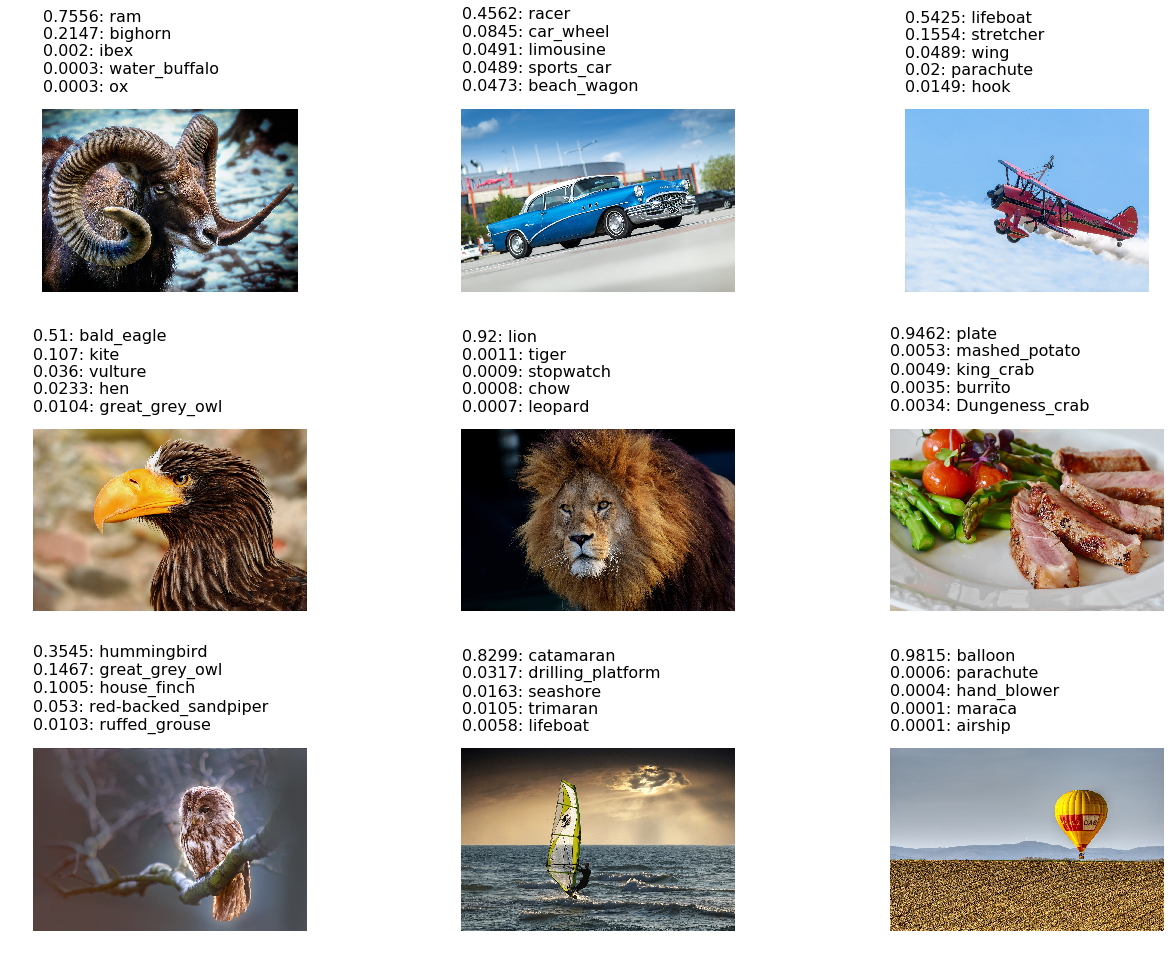

In [52]:
fig = plt.figure(figsize=(18, 12))
for i, obj in enumerate(entry):
    image_name, results = obj[0], obj[1]
    ax = plt.subplot(3, 3, 1+i)
    _ = ax.imshow(plt.imread(os.path.join(IMAGES_DIR, image_name)))
    _ = ax.text(1, 0, results, size=16)
    _ = ax.axis('off')

plt.tight_layout()
plt.subplots_adjust(hspace=0.75)
plt.show()